# **Electric Vehicle (EV) Market Analysis**

This notebook aims to analyze the **Electric Vehicle (EV) market size**, focusing on various aspects such as adoption over time, distribution by region, and types of EVs. 

The **analysis** includes **visualization and forecasting future market trends**.

In [ ]:
# Import necessary libraries for data manipulation, analysis, and visualization
import pandas as pd 
import numpy as np  
import seaborn as sns 
import matplotlib.pyplot as plt  
from scipy.optimize import curve_fit 
from tabulate import tabulate  

# Sets the visual style for Seaborn plots to "whitegrid"
sns.set_style("whitegrid") 


**Data Loading and Cleaning:** Preparing for Analysis


In [ ]:
# Load the data from a CSV file into a DataFrame
ev_data = pd.read_csv('Electric_Vehicle_Population_Data.csv')

# Returns the entire DataFrame sorted by index.
ev_data.sort_index()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177861,7SAYGDEE3N,Pierce,Bonney Lake,WA,98391.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,31.0,195224452,POINT (-122.183805 47.18062),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
177862,KM8K23AG1P,Mason,Shelton,WA,98584.0,2023,HYUNDAI,KONA ELECTRIC,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,35.0,228454180,POINT (-123.105305 47.211085),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.304596e+10
177863,5YJYGDEE6M,Grant,Quincy,WA,98848.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,13.0,168797219,POINT (-119.8493873 47.2339933),PUD NO 2 OF GRANT COUNTY,5.302501e+10
177864,WVGKMPE27M,King,Black Diamond,WA,98010.0,2021,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,5.0,182448801,POINT (-122.00451 47.312185),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


In [ ]:
#Provides a concise summary of the DataFrame, including column names, non-null counts, and data types
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177473 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177473 non-null  object 
 1   County                                             177473 non-null  object 
 2   City                                               177473 non-null  object 
 3   State                                              177473 non-null  object 
 4   Postal Code                                        177473 non-null  float64
 5   Model Year                                         177473 non-null  int64  
 6   Make                                               177473 non-null  object 
 7   Model                                              177473 non-null  object 
 8   Electric Vehicle Type                              177473 non-null  object 
 9 

In [ ]:
# Returns the count of duplicate and non-duplicate rows
ev_data.duplicated().value_counts()

False    177473
Name: count, dtype: int64

In [ ]:
# Retrieve boolean values indicating null entries and count them for each column to quickly check for missing data in each column
ev_data.isnull().sum()


VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [ ]:
# Eliminate all rows containing null values from the DataFrame
ev_data = ev_data.dropna()

# Check if the data has been cleaned by verifying no remaining null values
ev_data.isnull().sum()


VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

**EV Adoption Over Time**


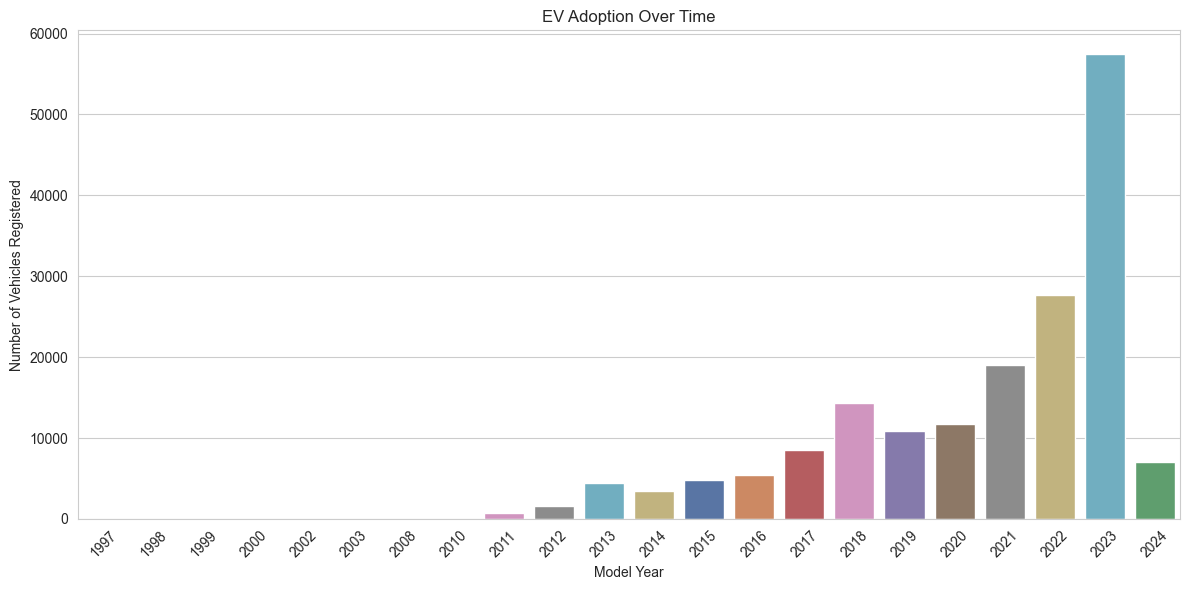

In [ ]:
# EV Adoption Over Time

# Set the figure size for the plot
plt.figure(figsize=(12, 6))

# Calculate the count of electric vehicles for each model year and sort the result by the model year index
ev_adoption_by_year = ev_data['Model Year'].value_counts().sort_index()

# Create a bar plot using Seaborn, with model years on the x-axis and the count of electric vehicles on the y-axis
sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, hue=ev_adoption_by_year, palette="deep", legend= False)

# Set the title of the plot
plt.title('EV Adoption Over Time')

# Set the label for the x-axis
plt.xlabel('Model Year')

# Set the label for the y-axis
plt.ylabel('Number of Vehicles Registered')

# Rotate the x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Adjust the layout of the plot to prevent overlapping elements
plt.tight_layout()

# Display the plot
plt.show()


<div style="font-size:12px;">
<strong>Findings on EV Adoption Over Time</strong>

</div>


<div style="font-size:11px;">

<em> 

The analysis reveals a positive trend in the adoption of electric vehicles (EVs) over the years, with a significant surge in registrations from 2020 onwards. The sharp increase in 2022 and 2023 indicates a growing shift towards sustainable transportation options.



This trend is expected to continue as technology advances, prices become more competitive, and EV infrastructure expands. These insights are valuable for policymakers, automotive manufacturers, and consumers, highlighting the need for ongoing monitoring and analysis to understand EV market dynamics and inform future decisions.

</em>
</div>


Now, let’s start by selecting the top 3 counties based on EV registrations and then analyze the distribution of EVs within the cities of those counties:

Number of duplicated DOL Vehicle IDs: 0


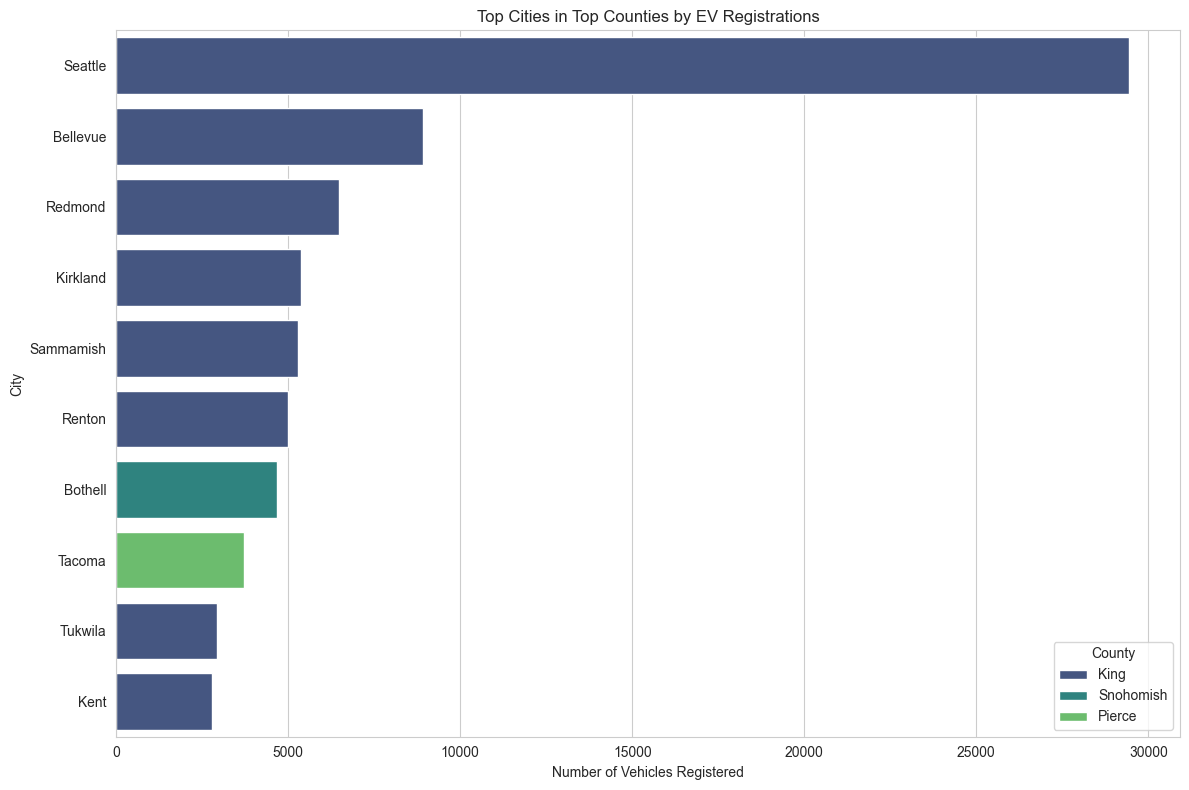

In [ ]:
# Check for duplicate DOL Vehicle IDs
duplicated_counts = ev_data['DOL Vehicle ID'].duplicated().sum()
print(f'Number of duplicated DOL Vehicle IDs: {duplicated_counts}')

# Count electric vehicles by county
county_distribution = ev_data['County'].value_counts()

# Get top 3 counties with the highest counts
top_counties = county_distribution.nlargest(3).index

# Filter data to include only the top counties
top_counties_data = ev_data[ev_data['County'].isin(top_counties)]

# Analyze EV distribution within cities of top counties
ev_city_distribution = (
    top_counties_data
    .groupby(['County', 'City'])
    .size()
    .sort_values(ascending=False)
    .reset_index(name='Number of Vehicles')
)

# Select top 10 cities by EV count
top_cities = ev_city_distribution.head(10)

# Create bar plot for top 10 cities in top counties by EV registrations
plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='City', hue='County', data=top_cities, palette="viridis")
plt.title('Top Cities in Top Counties by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('City')
plt.legend(title='County')
plt.tight_layout()
plt.show()


Let’s explore the types of electric vehicles represented in this dataset. Understanding the breakdown between different EV types, such as Battery Electric Vehicles (BEV) and Plug-in Hybrid Electric Vehicles (PHEV), can provide insights into consumer preferences.

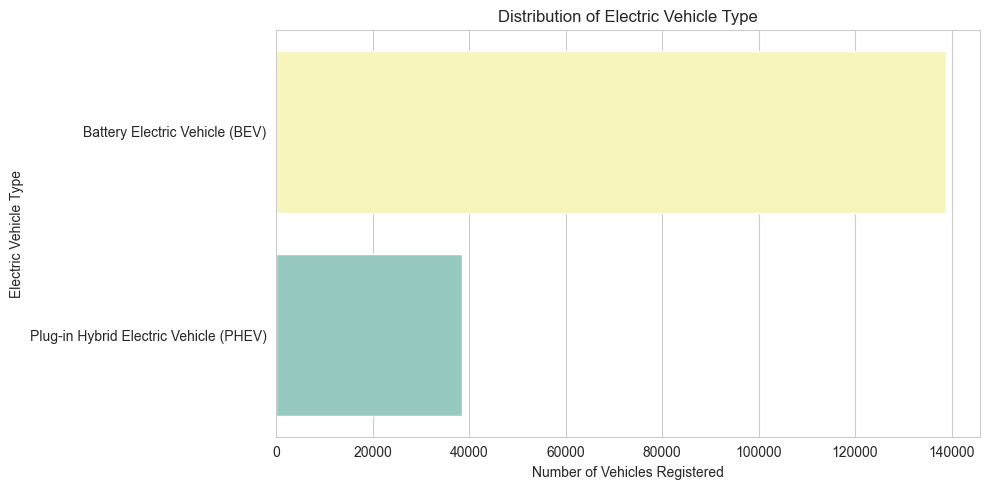

In [ ]:
# Count occurrences of each electric vehicle type and sort them
ev_type = ev_data['Electric Vehicle Type'].value_counts().sort_index()

# Plot the distribution of electric vehicle types using a bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x=ev_type.values, y=ev_type.index, hue = ev_type, legend= False, palette="Set3")
plt.title('Distribution of Electric Vehicle Type')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Electric Vehicle Type')
plt.tight_layout()
plt.show()


Let’s now focus on the popularity of electric vehicle manufacturers and models among the registered vehicles. 
Let’s have a look at the most popular manufacturers and then drill down into the most popular models.

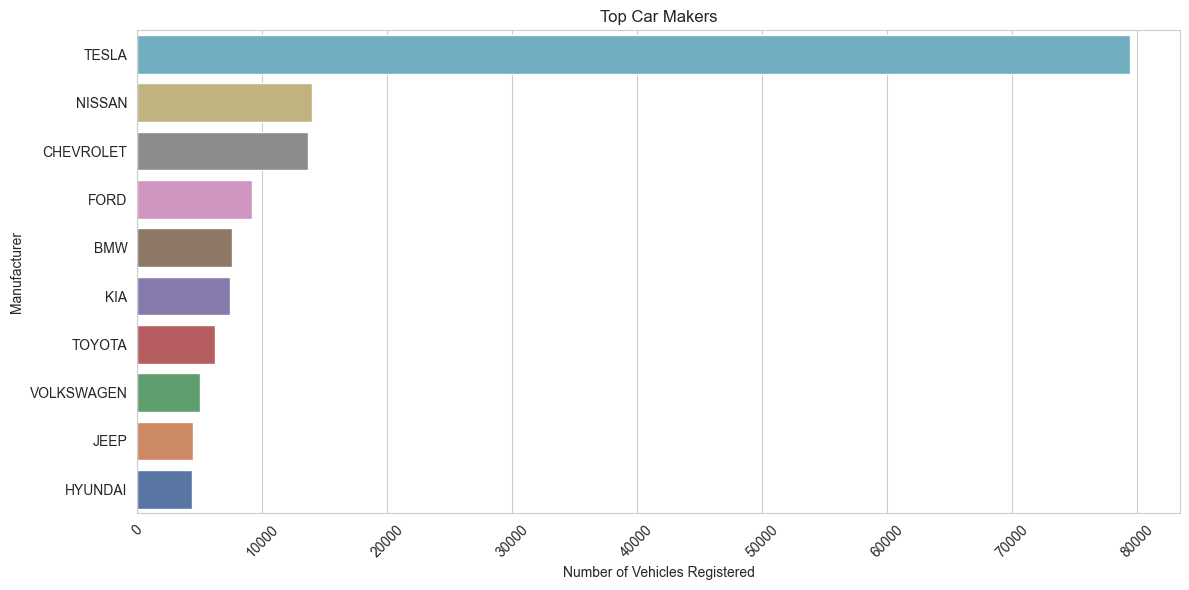

In [ ]:
# Count the occurrences of each car maker and select the top 10
car_makers = ev_data['Make'].value_counts().head(10)

# Plotting

plt.figure(figsize=(12, 6))

# Create a bar plot showing the top car makers
# x-axis: Number of vehicles registered
# y-axis: Car maker
# Using sns.barplot() with palette "deep"

sns.barplot(x = car_makers.values, y = car_makers.index, hue = car_makers, legend = False, palette= "deep")
plt.title('Top Car Makers')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Manufacturer')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Next, let’s drill down into the most popular models within these top manufacturers to get a more detailed understanding of consumer preferences at the model level:

<Axes: xlabel='Number of Vehicles', ylabel='Model'>

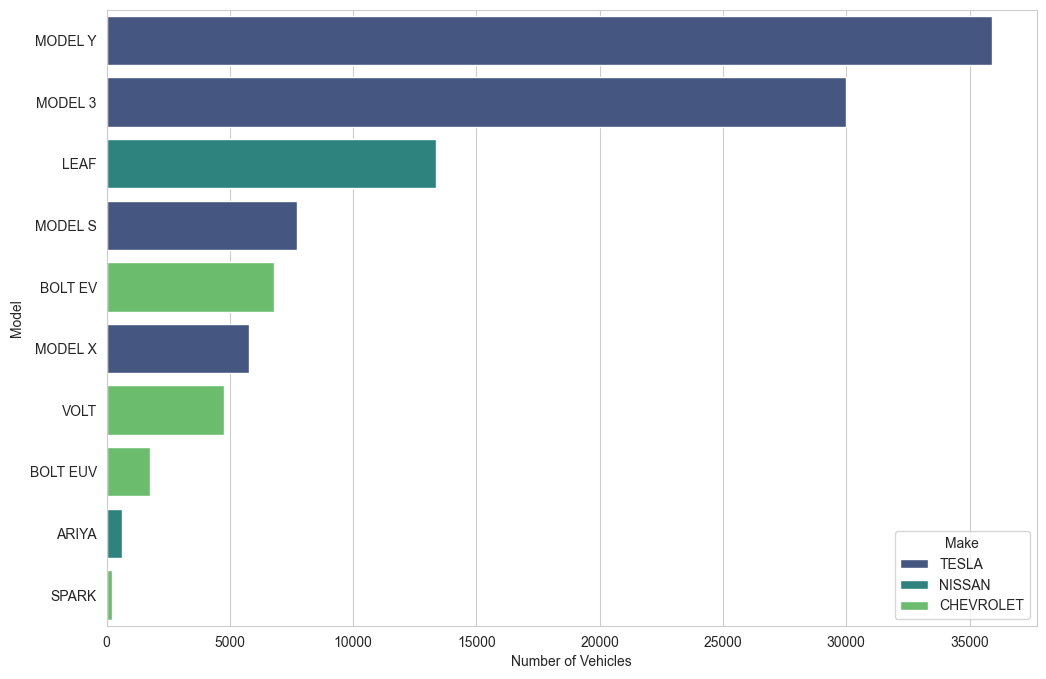

In [ ]:
# Count the occurrences of each car maker and select the top 3
car_makers = ev_data['Make'].value_counts().head(3).index

# Filter the dataset to include only data for the top car makers
sort_models_by_make = ev_data[ev_data['Make'].isin(car_makers)]

# Group the data by car maker and model, and count the number of vehicles for each combination
top_models = sort_models_by_make.groupby(['Make', 'Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# Select the top 10 models by the number of vehicles registered
top_models_10 = top_models.head(10)

# Plotting
plt.figure(figsize=(12,8))

# Create a bar plot showing the top 10 models within the top car makers
# x-axis: Number of vehicles
# y-axis: Model
# Hue: Car maker (to differentiate manufacturers)

sns.barplot(x='Number of Vehicles', y='Model', hue='Make', data=top_models_10, palette="viridis")

Next, we’ll explore the electric range of vehicles, which is a critical factor for analyzing the market size of electric vehicles.

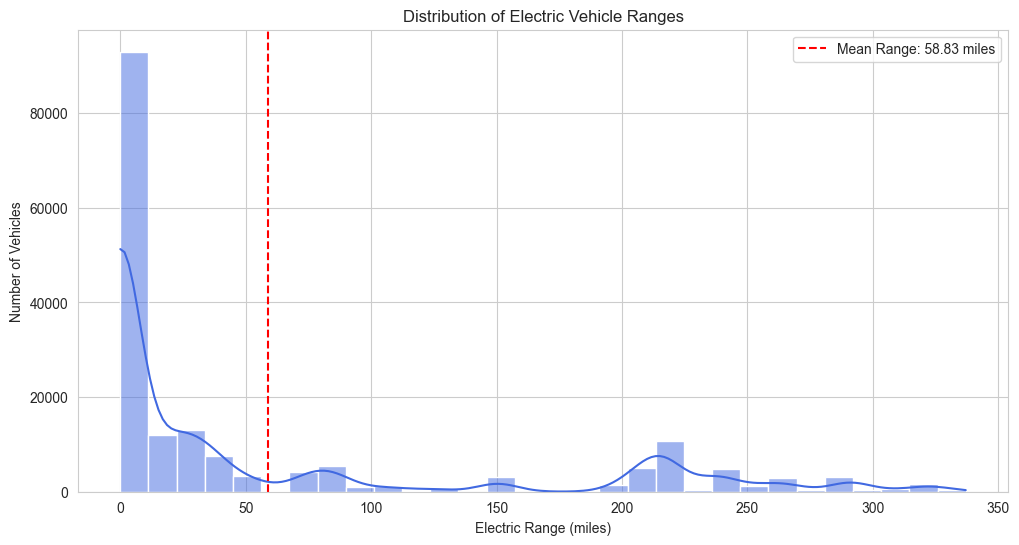

In [ ]:
# Analyzing the distribution of electric range

# Create a figure for the plot with a specified size
plt.figure(figsize=(12, 6))

# Plot a histogram of electric range values with 30 bins and a kernel density estimate
sns.histplot(ev_data['Electric Range'], bins=30, kde=True, color='royalblue')

# Set the title and labels for the plot
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Vehicles')

# Add a vertical dashed line indicating the mean electric range value
plt.axvline(ev_data['Electric Range'].mean(), color='red', linestyle='--', label=f'Mean Range: {ev_data["Electric Range"].mean():.2f} miles')

# Display the legend to indicate the meaning of the dashed line
plt.legend()

# Show the plot
plt.show()


Now, let’s delve into the trend of electric ranges over model years, which can provide insights into how advancements in battery technology and vehicle design have influenced the electric range capabilities of electric vehicles over time. 

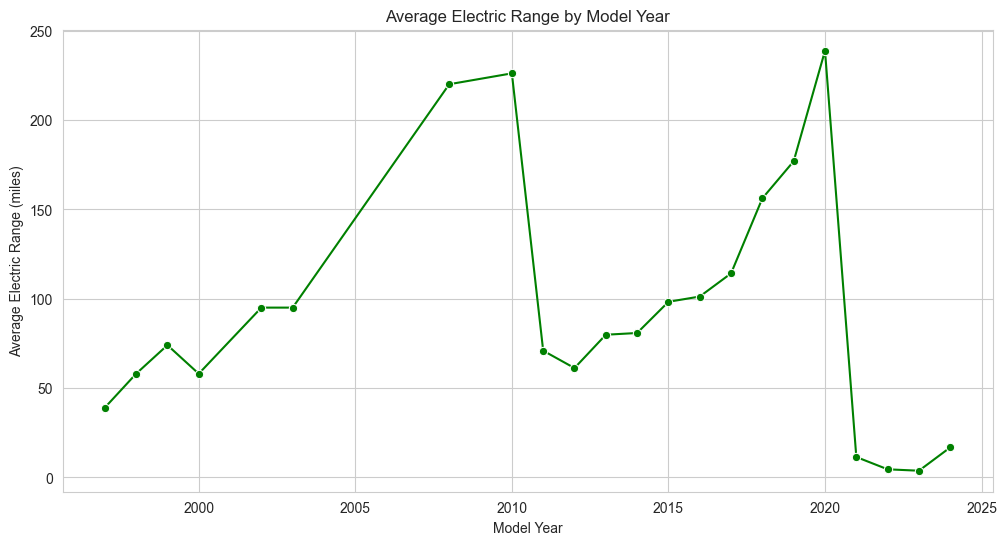

In [ ]:
# Calculating the average electric range by model year

# Group the electric vehicle data by 'Model Year' and calculate the mean electric range for each year
average_range_by_year = ev_data.groupby('Model Year')['Electric Range'].mean().reset_index()

# Create a new figure for the plot with a specified size
plt.figure(figsize=(12, 6))

# Plot a line graph showing the average electric range by model year
sns.lineplot(x='Model Year', y='Electric Range', data=average_range_by_year, marker='o', color='green')

# Set the title and labels for the plot
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')

# Enable grid lines on the plot
plt.grid(True)

# Display the plot
plt.show()


Next, let’s explore how electric ranges vary among the top manufacturers and models. This analysis can reveal how different manufacturers are addressing the crucial aspect of electric range and highlight which models stand out for their superior range capabilities:

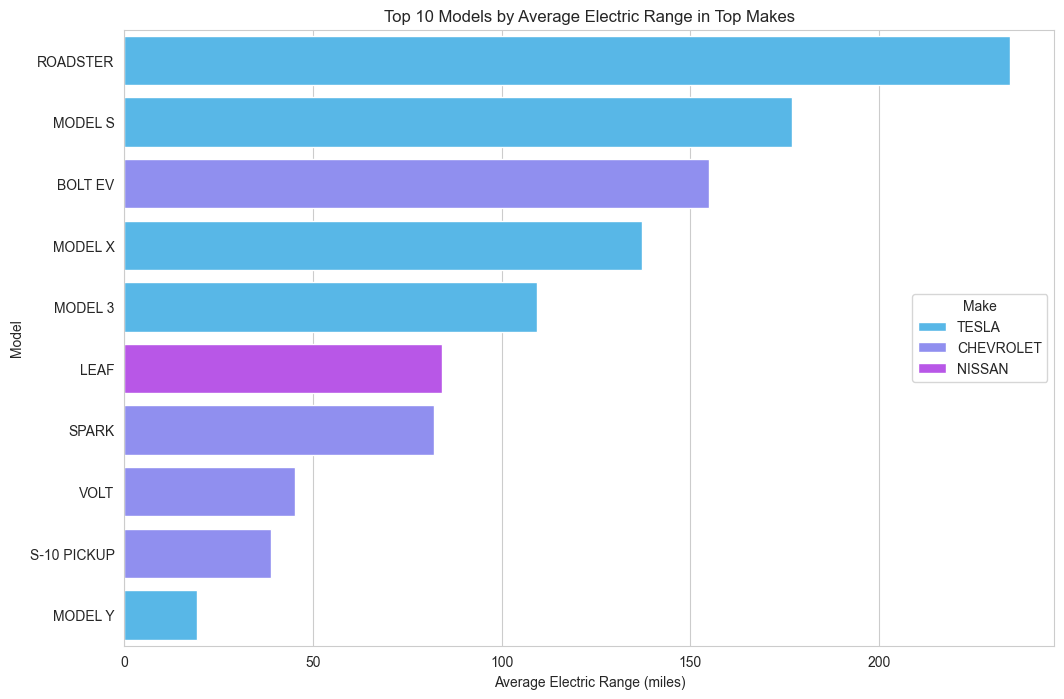

In [ ]:
# Calculate the average electric range by model and manufacturer
average_range_by_model = sort_models_by_make.groupby(['Make', 'Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()

# Select the top 10 models with the highest average electric range
top_range_models = average_range_by_model.head(10)

# Create a new figure for the plot with a specified size
plt.figure(figsize=(12, 8))

# Create a grouped bar plot showing the average electric range of the top 10 models
barplot = sns.barplot(x='Electric Range', y='Model', hue='Make', data=top_range_models, palette="cool")

# Set the title and labels for the plot
plt.title('Top 10 Models by Average Electric Range in Top Makes')
plt.xlabel('Average Electric Range (miles)')
plt.ylabel('Model')

# Add a legend to indicate the car manufacturer (Make)
plt.legend(title='Make', loc='center right')

# Display the plot
plt.show()


Estimated Market Size Analysis of Electric Vehicles in the United States

In [ ]:
# Calculate the number of electric vehicles registered each year
ev_registration_counts = ev_data['Model Year'].value_counts().sort_index()


The dataset provides the number of electric vehicles registered each year from 1997 through 2024. However, the data for 2024 is incomplete as it only contains the data till March. Here’s a summary of EV registrations for recent years:

In 2021, there were 19,063 EVs registered.
In 2022, the number increased to 27708 EVs.
In 2023, a significant jump to 57,519 EVs was observed.
For 2024, currently, 7,072 EVs are registered, which suggests partial data.

To forecast the total number of EVs expected to be registered in 2024, we can use a growth rate based approach from previous complete years.

We’ll calculate the Compound Annual Growth Rate (CAGR) between a recent year with complete data (2023) and an earlier year to project the 2024 figures. Additionally, using this growth rate, we can estimate the market size for the next five years. Let’s proceed with these calculations:

In [ ]:
# Filter the dataset to include years with complete data, assuming 2023 is the last complete year
filtered_years = ev_registration_counts[ev_registration_counts.index <= 2023]

# Define a function for exponential growth to fit the data
def exp_growth(x, a, b):
    return a * np.exp(b * x)

# Prepare the data for curve fitting
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

# Fit the data to the exponential growth function
params, covariance = curve_fit(exp_growth, x_data, y_data)

# Use the fitted function to forecast the number of EVs for 2024 and the next five years
forecast_years = np.arange(2024, 2024 + 6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)

# Create a dictionary to display the forecasted values for easier interpretation
forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), forecasted_values))

print(forecasted_evs)


{2024: 79079.20808938889, 2025: 119653.96274428742, 2026: 181047.22020265696, 2027: 273940.74706208805, 2028: 414497.01805382164, 2029: 627171.3128407666}


Now, let’s plot the estimated market size data:



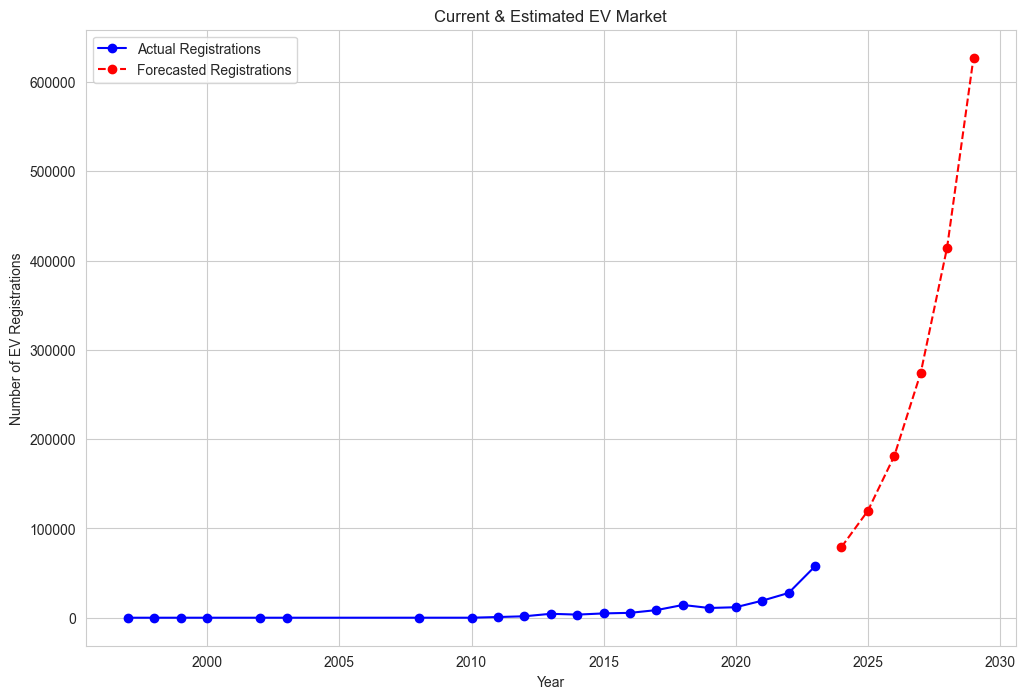

In [ ]:
# Prepare data for plotting

# Define years for plotting based on available and forecasted data
years = np.arange(filtered_years.index.min(), 2029 + 1)
actual_years = filtered_years.index
forecast_years_full = np.arange(2024, 2029 + 1)

# Gather actual and forecasted values for plotting
actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]

# Create a figure for the plot with a specified size
plt.figure(figsize=(12, 8))

# Plot actual EV registrations over available years
plt.plot(actual_years, actual_values, 'bo-', label='Actual Registrations')

# Plot forecasted EV registrations for future years
plt.plot(forecast_years_full, forecasted_values_full, 'ro--', label='Forecasted Registrations')

# Set plot title and axis labels
plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')

# Display legend and grid lines on the plot
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


Summary:
So, market size analysis is a crucial aspect of market research that determines the potential sales volume within a given market. It helps businesses understand the magnitude of demand, assess market saturation levels, and identify growth opportunities. From our market size analysis of electric vehicles, we found a promising future for the EV industry, indicating a significant shift in consumer preferences and a potential increase in related investment and business opportunities.